In [13]:
from openai import AzureOpenAI
import pandas as pd
import json, math, re, ast

# 1. Hard-coded Azure connection
client = AzureOpenAI(
    azure_endpoint="https://genai-openai-eus.openai.azure.com/",
    api_key="ae9587f69088409992009cb7bcf61436",
    api_version="2024-05-01-preview"
)

deployment_name = "genai-GPT4o-mini"
temperature = 0.0

# 2. Load CSV
df = pd.read_csv("biogpt_base_0.8_wrong_answers.csv")  # change to 0.85 if needed
questions = df["Question"].dropna().tolist()

batch_size = 40
batches = math.ceil(len(questions) / batch_size)
all_results = []

# 3. Ask Azure OpenAI in batches
for i in range(batches):
    batch_questions = questions[i*batch_size:(i+1)*batch_size]
    prompt = f"""
You are analyzing biomedical research questions for error analysis.

Classify each question into ONE of the following 5 categories:
1. Treatment/Intervention
2. Mechanism/Pathophysiology
3. Diagnosis/Screening
4. Prognosis/Outcome
5. Epidemiology/Risk

Return ONLY a valid JSON array (no explanation, no markdown) in this format:
[
  {{"Question": "...", "Category": "..."}}
]

Questions:
{chr(10).join([f"{idx+1}. {q}" for idx, q in enumerate(batch_questions)])}
"""

    print(f"Processing batch {i+1}/{batches} ...")

    response = client.chat.completions.create(
        model=deployment_name,
        messages=[{"role": "user", "content": prompt}],
        temperature=temperature
    )
    content = response.choices[0].message.content.strip()

    # Safe parsing of model output
    batch_result = []
    try:
        batch_result = json.loads(content)
    except Exception:
        json_text = re.findall(r"\[.*\]", content, re.S)
        if json_text:
            try:
                batch_result = ast.literal_eval(json_text[0])
            except Exception:
                batch_result = []
    if not batch_result:
        print(f"Could not parse batch {i+1}. Output snippet:\n{content[:300]}\n")
    else:
        all_results.extend(batch_result)

print(f"Parsed total items: {len(all_results)}")

# 4. Merge & Save
if all_results:
    cat_df = pd.DataFrame(all_results)
    cat_df.columns = [c.strip().lower() for c in cat_df.columns]
    df.columns = [c.strip().lower() for c in df.columns]

    if "question" in cat_df.columns and "question" in df.columns:
        merged_df = df.merge(cat_df, on="question", how="left")
    else:
        raise KeyError(f"Expected 'Question' column. Got: {cat_df.columns}")

    output_path = "biogpt_base_0.8_wrong_answers_categorized.csv"
    merged_df.to_csv(output_path, index=False)
    print(f"Saved categorized dataset to: {output_path}")
    print(merged_df.head())
else:
    print("No parsed data found — check LLM outputs above.")


Processing batch 1/1 ...
Parsed total items: 10
Saved categorized dataset to: biogpt_base_0.8_wrong_answers_categorized.csv
   pubmed id                                           question  \
0   20337202  Continuation of pregnancy after antenatal cort...   
1    8985020  Does induction chemotherapy have a role in the...   
2   27217036  Neoadjuvant Imatinib in Locally Advanced Gastr...   
3   27184293  Does microbial contamination influence the suc...   
4   23321509  Quaternary cytoreductive surgery in ovarian ca...   

                                             context  \
0  To determine the duration of continuing pregna...   
1  To assess the outcomes of patients with nasoph...   
2  Longer duration of neoadjuvant (NA) imatinib (...   
3  Microbial contamination can be a marker for fa...   
4  To evaluate surgical outcome and survival bene...   

                                    generated answer  \
0  Question: Continuation of pregnancy after ante...   
1  Question: Does induct

In [14]:
from openai import AzureOpenAI
import pandas as pd
import json, math, re, ast

# 1. Hard-coded Azure connection
client = AzureOpenAI(
    azure_endpoint="https://genai-openai-eus.openai.azure.com/",
    api_key="ae9587f69088409992009cb7bcf61436",
    api_version="2024-05-01-preview"
)

deployment_name = "genai-GPT4o-mini"
temperature = 0.0

# 2. Load CSV
df = pd.read_csv("biogpt_base_0.85_wrong_answers.csv")  # change to 0.85 if needed
questions = df["Question"].dropna().tolist()

batch_size = 40
batches = math.ceil(len(questions) / batch_size)
all_results = []

# 3. Ask Azure OpenAI in batches
for i in range(batches):
    batch_questions = questions[i*batch_size:(i+1)*batch_size]
    prompt = f"""
You are analyzing biomedical research questions for error analysis.

Classify each question into ONE of the following 5 categories:
1. Treatment/Intervention
2. Mechanism/Pathophysiology
3. Diagnosis/Screening
4. Prognosis/Outcome
5. Epidemiology/Risk

Return ONLY a valid JSON array (no explanation, no markdown) in this format:
[
  {{"Question": "...", "Category": "..."}}
]

Questions:
{chr(10).join([f"{idx+1}. {q}" for idx, q in enumerate(batch_questions)])}
"""

    print(f"Processing batch {i+1}/{batches} ...")

    response = client.chat.completions.create(
        model=deployment_name,
        messages=[{"role": "user", "content": prompt}],
        temperature=temperature
    )
    content = response.choices[0].message.content.strip()

    # Safe parsing of model output
    batch_result = []
    try:
        batch_result = json.loads(content)
    except Exception:
        json_text = re.findall(r"\[.*\]", content, re.S)
        if json_text:
            try:
                batch_result = ast.literal_eval(json_text[0])
            except Exception:
                batch_result = []
    if not batch_result:
        print(f"Could not parse batch {i+1}. Output snippet:\n{content[:300]}\n")
    else:
        all_results.extend(batch_result)

print(f"Parsed total items: {len(all_results)}")

# 4. Merge & Save
if all_results:
    cat_df = pd.DataFrame(all_results)
    cat_df.columns = [c.strip().lower() for c in cat_df.columns]
    df.columns = [c.strip().lower() for c in df.columns]

    if "question" in cat_df.columns and "question" in df.columns:
        merged_df = df.merge(cat_df, on="question", how="left")
    else:
        raise KeyError(f"Expected 'Question' column. Got: {cat_df.columns}")

    output_path = "biogpt_base_0.85_wrong_answers_categorized.csv"
    merged_df.to_csv(output_path, index=False)
    print(f"Saved categorized dataset to: {output_path}")
    print(merged_df.head())
else:
    print("No parsed data found — check LLM outputs above.")


Processing batch 1/20 ...
Processing batch 2/20 ...
Processing batch 3/20 ...
Processing batch 4/20 ...
Processing batch 5/20 ...
Processing batch 6/20 ...
Processing batch 7/20 ...
Processing batch 8/20 ...
Processing batch 9/20 ...
Processing batch 10/20 ...
Processing batch 11/20 ...
Processing batch 12/20 ...
Processing batch 13/20 ...
Processing batch 14/20 ...
Processing batch 15/20 ...
Processing batch 16/20 ...
Processing batch 17/20 ...
Processing batch 18/20 ...
Processing batch 19/20 ...
Processing batch 20/20 ...
Parsed total items: 780
Saved categorized dataset to: biogpt_base_0.85_wrong_answers_categorized.csv
   pubmed id                                           question  \
0   21645374  Do mitochondria play a role in remodelling lac...   
1   16418930  Landolt C and snellen e acuity: differences in...   
2    9488747  Syncope during bathing in infants, a pediatric...   
3   17208539  Are the long-term results of the transanal pul...   
4   23831910  Double balloon ente

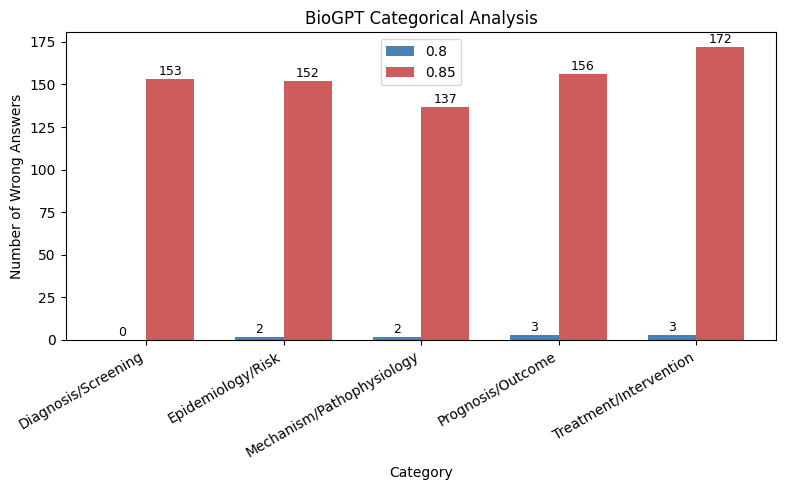

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load categorized CSVs
df_08 = pd.read_csv("biogpt_base_0.8_wrong_answers_categorized.csv")
df_085 = pd.read_csv("biogpt_base_0.85_wrong_answers_categorized.csv")

# 2. Normalize column names
df_08.columns = [c.strip().lower() for c in df_08.columns]
df_085.columns = [c.strip().lower() for c in df_085.columns]

# 3. Count number of errors per category
count_08 = df_08["category"].value_counts().sort_index()
count_085 = df_085["category"].value_counts().sort_index()

# 4. Merge into a single DataFrame
comparison = pd.DataFrame({
    "Threshold_0.8": count_08,
    "Threshold_0.85": count_085
}).fillna(0).astype(int)

# 5. Plot side-by-side bars with labels
categories = comparison.index
x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars_08 = ax.bar(x - width/2, comparison["Threshold_0.8"], width, label="0.8", color="steelblue")
bars_085 = ax.bar(x + width/2, comparison["Threshold_0.85"], width, label="0.85", color="indianred")

# Add labels on top of each bar
for bar in bars_08:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{int(height)}", ha="center", va="bottom", fontsize=9)

for bar in bars_085:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{int(height)}", ha="center", va="bottom", fontsize=9)

ax.set_xlabel("Category")
ax.set_ylabel("Number of Wrong Answers")
ax.set_title("BioGPT Categorical Analysis")
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=30, ha="right")
ax.legend()

plt.tight_layout()
plt.show()


BioGPT Base (0.8): 10 wrong answers
BioGPT Base (0.85): 780 wrong answers
BioGPT Instruction (0.8): 24 wrong answers
BioGPT Instruction (0.85): 932 wrong answers
BioGPT LoRA (0.8): 14 wrong answers
BioGPT LoRA (0.85): 870 wrong answers


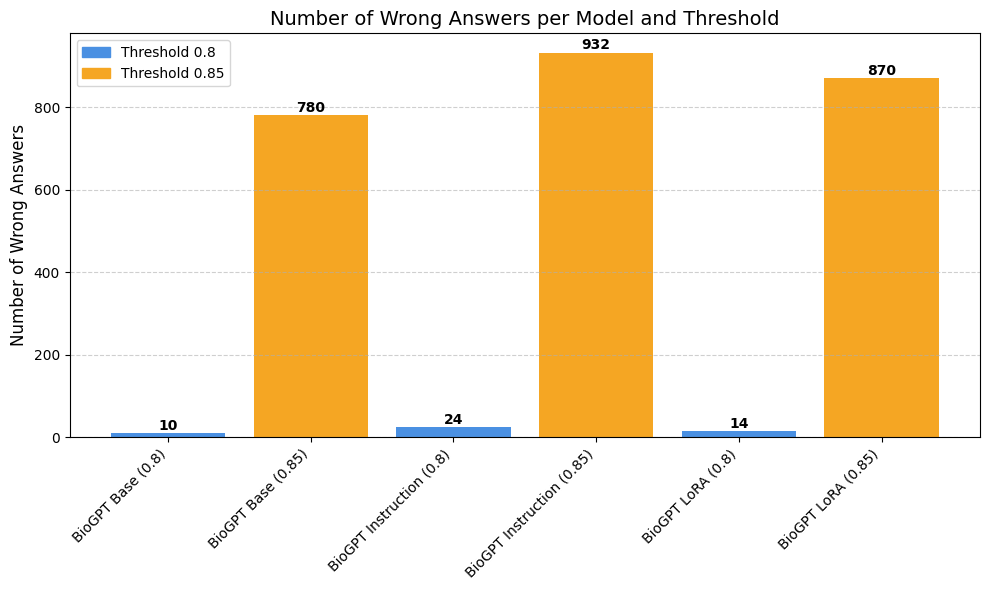


Summary Table:
                       Model  Wrong Answers
0          BioGPT Base (0.8)             10
1         BioGPT Base (0.85)            780
2   BioGPT Instruction (0.8)             24
3  BioGPT Instruction (0.85)            932
4          BioGPT LoRA (0.8)             14
5         BioGPT LoRA (0.85)            870


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# ============================================
# File paths
# ============================================
files = {
    "BioGPT Base (0.8)": "biogpt_base_0.8_wrong_answers.csv",
    "BioGPT Base (0.85)": "biogpt_base_0.85_wrong_answers.csv",
    "BioGPT Instruction (0.8)": "biogpt_instruction_0.8_wrong_answers.csv",
    "BioGPT Instruction (0.85)": "biogpt_instruction_0.85_wrong_answers.csv",
    "BioGPT LoRA (0.8)": "biogpt_lora_0.8_wrong_answers.csv",
    "BioGPT LoRA (0.85)": "biogpt_lora_0.85_wrong_answers.csv",
}

# ============================================
# Count rows (wrong answers)
# ============================================
error_counts = {}
for name, path in files.items():
    df = pd.read_csv(path)
    error_counts[name] = len(df)
    print(f"{name}: {len(df)} wrong answers")

# Convert to DataFrame
error_df = pd.DataFrame(list(error_counts.items()), columns=["Model", "Wrong Answers"])

# Determine color by threshold
colors = ["#4A90E2" if "(0.8)" in model else "#F5A623" for model in error_df["Model"]]

# ============================================
# Plot bar chart
# ============================================
plt.figure(figsize=(10, 6))
bars = plt.bar(error_df["Model"], error_df["Wrong Answers"], color=colors)

# Add numeric labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold"
    )

# Chart formatting
plt.title("Number of Wrong Answers per Model and Threshold", fontsize=14)
plt.ylabel("Number of Wrong Answers", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(handles=[
    plt.Rectangle((0, 0), 1, 1, color="#4A90E2", label="Threshold 0.8"),
    plt.Rectangle((0, 0), 1, 1, color="#F5A623", label="Threshold 0.85"),
])
plt.tight_layout()
plt.show()

# ============================================
# Print summary table
# ============================================
print("\nSummary Table:")
print(error_df)
